In [1]:
import pandas as pd
import warnings
# Tüm uyarıları kapatma
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("egitim.csv")

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0539_02,Europa,True,C/18/P,55 Cancri e,36.0,False,0.0,0.0,0.0,0.0,0.0,Achyon Nalanet,True
1,0539_03,NaN,True,C/18/P,55 Cancri e,30.0,False,0.0,0.0,0.0,0.0,0.0,Alderak Nalanet,True
2,0539_04,Europa,True,C/18/P,TRAPPIST-1e,49.0,False,0.0,0.0,0.0,0.0,0.0,Betenif Nalanet,True
3,0539_05,Europa,False,C/18/P,TRAPPIST-1e,38.0,False,0.0,1793.0,479.0,9.0,4987.0,Mardyon Nalanet,False
4,0540_01,Mars,True,F/95/S,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Jell Conie,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8193 non-null   object 
 1   HomePlanet    8007 non-null   object 
 2   CryoSleep     7988 non-null   object 
 3   Cabin         8012 non-null   object 
 4   Destination   8017 non-null   object 
 5   Age           8029 non-null   float64
 6   VIP           7994 non-null   object 
 7   RoomService   8026 non-null   float64
 8   FoodCourt     8016 non-null   float64
 9   ShoppingMall  8003 non-null   float64
 10  Spa           8018 non-null   float64
 11  VRDeck        8014 non-null   float64
 12  Name          8004 non-null   object 
 13  Transported   8193 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 840.2+ KB


In [5]:
for column in df.columns:
    print(column,len(df[column].unique()))

PassengerId 8193
HomePlanet 4
CryoSleep 3
Cabin 6187
Destination 4
Age 81
VIP 3
RoomService 1229
FoodCourt 1456
ShoppingMall 1080
Spa 1282
VRDeck 1265
Name 7988
Transported 2


In [6]:
df = df.drop(["PassengerId","Name"],axis=1)
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,True,C/18/P,55 Cancri e,36.0,False,0.0,0.0,0.0,0.0,0.0,True
1,NaN,True,C/18/P,55 Cancri e,30.0,False,0.0,0.0,0.0,0.0,0.0,True
2,Europa,True,C/18/P,TRAPPIST-1e,49.0,False,0.0,0.0,0.0,0.0,0.0,True
3,Europa,False,C/18/P,TRAPPIST-1e,38.0,False,0.0,1793.0,479.0,9.0,4987.0,False
4,Mars,True,F/95/S,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8188,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8189,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8190,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8191,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8007 non-null   object 
 1   CryoSleep     7988 non-null   object 
 2   Cabin         8012 non-null   object 
 3   Destination   8017 non-null   object 
 4   Age           8029 non-null   float64
 5   VIP           7994 non-null   object 
 6   RoomService   8026 non-null   float64
 7   FoodCourt     8016 non-null   float64
 8   ShoppingMall  8003 non-null   float64
 9   Spa           8018 non-null   float64
 10  VRDeck        8014 non-null   float64
 11  Transported   8193 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 712.2+ KB


In [8]:
df[["Cabin1","Cabin_num","Cabin2"]] = df["Cabin"].str.split('/',expand=True)
df.drop("Cabin",axis=1,inplace=True)
df["Cabin_num"] = pd.to_numeric(df["Cabin_num"])
#df['Cabin_harf'] = df["Cabin1"] + df["Cabin2"]
#df.drop(["Cabin1","Cabin2"],axis=1,inplace=True)
#df.drop("Cabin_num",axis=1,inplace=True)


In [9]:
summary_table = df.describe().drop('count',axis=0)#.drop('id',axis=1)

mod = {}

columns = summary_table.columns

for column in columns:

    mods = df[column].mode()
    mod_value = ""

    for i in range(0,len(mods)):
        mod_value += str(mods.iloc[i]) + ", "

    mod.update({column:mod_value[:-2]})

mod = pd.DataFrame(pd.Series(mod))
iqr = pd.DataFrame(summary_table.loc['75%'] - summary_table.loc['25%'])

summary_table = pd.concat([summary_table,mod.T,iqr.T])
summary_table.index = ['ortalama','standart_sapma','minimum','1.ceyrek','ortanca',
                       '3.ceyrek','maksimum','mod','iqr']

summary_table

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num
ortalama,28.804085,223.140294,455.833957,174.059853,308.058992,307.347517,634.512232
standart_sapma,14.465863,662.599991,1609.86249,605.580972,1130.079744,1153.716354,507.126117
minimum,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.ceyrek,19.0,0.0,0.0,0.0,0.0,0.0,199.0
ortanca,27.0,0.0,0.0,0.0,0.0,0.0,475.5
3.ceyrek,38.0,46.0,75.25,27.0,61.0,45.0,1032.0
maksimum,79.0,14327.0,29813.0,23492.0,22408.0,24133.0,1894.0
mod,24.0,0.0,0.0,0.0,0.0,0.0,82.0
iqr,19.0,46.0,75.25,27.0,61.0,45.0,833.0


In [10]:
sutunlar = df.select_dtypes(exclude=["number"]).columns

kategorik_ozet = pd.DataFrame(columns=sutunlar,index=['mod','sayac'])

for sutun in sutunlar:
    sinif_verisi = True #False
    filtre = (df["Transported"] == sinif_verisi)
    mod = df[filtre][sutun].value_counts().idxmax()
    sayac = df[filtre][sutun].value_counts().max()
    kategorik_ozet.loc['mod',sutun] = mod
    kategorik_ozet.loc['sayac',sutun] = sayac
kategorik_ozet

,HomePlanet,CryoSleep,Destination,VIP,Transported,Cabin1,Cabin2
mod,Earth,True,TRAPPIST-1e,False,True,G,S
sayac,1850,2335,2621,3956,4128,1253,2246


In [11]:
numerik_sutunlar = df.select_dtypes(include=["number"]).columns
kategorik_sutunlar = df.select_dtypes(exclude=["number"]).columns.drop("Transported") #sinif verisi cikarildi

In [12]:
aykiri_degersiz_df = df.copy()

In [13]:
sinif_degerleri = df["Transported"].unique()

alt_sinirlar = {}
ust_sinirlar = {}

for i in range(0):
    for sinif_degeri in sinif_degerleri:
        sinif = (aykiri_degersiz_df["Transported"] == sinif_degeri)
        for sutun in numerik_sutunlar:

            q1 = aykiri_degersiz_df[sinif][sutun].quantile(0.25)
            q3 = aykiri_degersiz_df[sinif][sutun].quantile(0.75)
            iqr = q3-q1

            alt_sinir = q1 - (iqr*1.5)
            ust_sinir = q3 + (iqr*1.5)
            
            alt_sinirlar[sutun] = alt_sinir
            ust_sinirlar[sutun] = ust_sinir
            
            filtre = ((aykiri_degersiz_df[sinif][sutun] < alt_sinir) | (aykiri_degersiz_df[sinif][sutun] > ust_sinir))
            
            #print(sutun,alt_sinir,ust_sinir)
            
            aykiri_degersiz_df.loc[sinif & filtre, sutun] = None
            #print(sutun,df[sinif][filtre][sutun].count())
    
aykiri_degersiz_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num
count,8029.000000,8026.000000,8016.000000,8003.000000,8018.000000,8014.000000,8012.000000
mean,28.804085,223.140294,455.833957,174.059853,308.058992,307.347517,634.512232
std,14.465863,662.599991,1609.862490,605.580972,1130.079744,1153.716354,507.126117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,199.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,475.500000
75%,38.000000,46.000000,75.250000,27.000000,61.000000,45.000000,1032.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1894.000000


In [14]:
# boş veriler sınıf verilerine göre dolduruldu.

sinif = "Transported"

temiz_df = aykiri_degersiz_df.copy()

for sutun in numerik_sutunlar:
    for sinif_verisi in aykiri_degersiz_df[sinif].unique():
        filtre = (aykiri_degersiz_df[sinif] == sinif_verisi)
        ortalama = aykiri_degersiz_df[filtre][sutun].mean()
        temiz_df.loc[filtre,sutun] = aykiri_degersiz_df.loc[filtre,sutun].fillna(ortalama)
        
for sutun in kategorik_sutunlar:
    for sinif_verisi in aykiri_degersiz_df[sinif].unique():
        filtre = (aykiri_degersiz_df[sinif] == sinif_verisi)
        mod = aykiri_degersiz_df[filtre][sutun].value_counts().idxmax()   #sayac = df[filtre][sutun].value_counts().max()
        temiz_df.loc[filtre,sutun] = aykiri_degersiz_df.loc[filtre,sutun].fillna(mod)
        
temiz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8193 non-null   object 
 1   CryoSleep     8193 non-null   object 
 2   Destination   8193 non-null   object 
 3   Age           8193 non-null   float64
 4   VIP           8193 non-null   object 
 5   RoomService   8193 non-null   float64
 6   FoodCourt     8193 non-null   float64
 7   ShoppingMall  8193 non-null   float64
 8   Spa           8193 non-null   float64
 9   VRDeck        8193 non-null   float64
 10  Transported   8193 non-null   bool   
 11  Cabin1        8193 non-null   object 
 12  Cabin_num     8193 non-null   float64
 13  Cabin2        8193 non-null   object 
dtypes: bool(1), float64(7), object(6)
memory usage: 840.2+ KB


In [15]:
temiz_df['CryoSleep'] = df['CryoSleep'].astype(bool)
temiz_df['VIP'] = df['VIP'].astype(bool)
temiz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8193 non-null   object 
 1   CryoSleep     8193 non-null   bool   
 2   Destination   8193 non-null   object 
 3   Age           8193 non-null   float64
 4   VIP           8193 non-null   bool   
 5   RoomService   8193 non-null   float64
 6   FoodCourt     8193 non-null   float64
 7   ShoppingMall  8193 non-null   float64
 8   Spa           8193 non-null   float64
 9   VRDeck        8193 non-null   float64
 10  Transported   8193 non-null   bool   
 11  Cabin1        8193 non-null   object 
 12  Cabin_num     8193 non-null   float64
 13  Cabin2        8193 non-null   object 
dtypes: bool(3), float64(7), object(4)
memory usage: 728.2+ KB


In [16]:
temiz_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num
count,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000
mean,28.804805,223.305846,455.958795,174.066672,308.131647,307.239634,634.519616
std,14.321175,656.211439,1592.412296,598.517410,1118.533247,1141.586798,501.505900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,202.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,499.000000
75%,37.000000,64.146492,118.000000,45.000000,71.000000,70.000000,1020.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1894.000000


In [17]:
temiz_df.head(20)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin1,Cabin_num,Cabin2
0,Europa,True,55 Cancri e,36.0,False,0.0,0.0,0.0,0.0,0.0,True,C,18.0,P
1,Earth,True,55 Cancri e,30.0,False,0.0,0.0,0.0,0.0,0.0,True,C,18.0,P
2,Europa,True,TRAPPIST-1e,49.0,False,0.0,0.0,0.0,0.0,0.0,True,C,18.0,P
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,1793.0,479.0,9.0,4987.0,False,C,18.0,P
4,Mars,True,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,True,F,95.0,S
5,Earth,False,TRAPPIST-1e,17.0,False,1471.0,0.0,0.0,45.0,16.0,False,F,95.0,S
6,Earth,False,TRAPPIST-1e,26.0,False,9.0,0.0,0.0,0.0,878.0,False,G,84.0,P
7,Earth,False,TRAPPIST-1e,23.0,False,59.0,0.0,0.0,681.0,0.0,False,F,111.0,P
8,Earth,False,55 Cancri e,24.0,False,930.0,691.0,838.0,0.0,0.0,False,F,96.0,S
9,Earth,False,TRAPPIST-1e,23.0,False,0.0,15.0,831.0,16.0,3.0,False,F,97.0,S


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

sc = StandardScaler()
nm = Normalizer()

#temiz_df[numerik_sutunlar] = pd.DataFrame(sc.fit_transform(temiz_df[numerik_sutunlar]))
#temiz_df[numerik_sutunlar] = pd.DataFrame(nm.fit_transform(temiz_df[numerik_sutunlar]))
#temiz_df

In [19]:
df_encoded = pd.get_dummies(temiz_df,['HomePlanet','Destination','Cabin1','Cabin2'])
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8193 non-null   bool   
 1   Age                        8193 non-null   float64
 2   VIP                        8193 non-null   bool   
 3   RoomService                8193 non-null   float64
 4   FoodCourt                  8193 non-null   float64
 5   ShoppingMall               8193 non-null   float64
 6   Spa                        8193 non-null   float64
 7   VRDeck                     8193 non-null   float64
 8   Transported                8193 non-null   bool   
 9   Cabin_num                  8193 non-null   float64
 10  HomePlanet_Earth           8193 non-null   uint8  
 11  HomePlanet_Europa          8193 non-null   uint8  
 12  HomePlanet_Mars            8193 non-null   uint8  
 13  Destination_55 Cancri e    8193 non-null   uint8

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [21]:
x = df_encoded.drop("Transported",axis=1)
y = df_encoded["Transported"]

In [22]:
# param_grid = {
#     'n_estimators':[50,100,150],
#     'max_depth':[None,10,20],
#     'min_samples_split':[2,5,10],
#     'max_features':['sqrt','log2']
# }

# rfc_model = RandomForestClassifier(random_state=42)

# rfc_grid_search = GridSearchCV(estimator = rfc_model, param_grid=param_grid, cv=5, n_jobs=-1)

# rfc_grid_search.fit(xtrain,ytrain)

# rfc_best_params = rfc_grid_search.best_params_
# rfc_best_model = rfc_grid_search.best_estimator_

# print(rfc_best_params)

# y_pred = rfc_best_model.predict(xtest)
# accuracy = accuracy_score(ytest,y_pred)

# print(accuracy)

In [23]:
#results = rfc_grid_search.cv_results_

# Her bir parametre kombinasyonunun skorları
#for mean_score, params in zip(results["mean_test_score"], results["params"]):
#    print("{:.4f} - {}".format(mean_score, params))

In [24]:
# param_grid = {
#     'n_neighbors':[3,5,7,9],
#     'p':[1,2]
# }

# knn_model = KNeighborsClassifier()

# knn_grid_search = GridSearchCV(estimator = knn_model, param_grid=param_grid, cv=5, n_jobs=-1)

# knn_grid_search.fit(xtrain,ytrain)

# knn_best_params = knn_grid_search.best_params_
# knn_best_model = knn_grid_search.best_estimator_

# print(knn_best_params)

# y_pred = knn_best_model.predict(xtest)
# accuracy = accuracy_score(ytest,y_pred)

# print(accuracy)

In [25]:
# results = knn_grid_search.cv_results_

# # Her bir parametre kombinasyonunun skorları
# for mean_score, params in zip(results["mean_test_score"], results["params"]):
#     print("{:.4f} - {}".format(mean_score, params))

In [26]:
knn_accuracy_list = []
knn_precision_list = []
knn_f1_list = []

best_knn = None
best_knn_skor = 0

for i in range(20):  
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30)
    knn_model = KNeighborsClassifier(n_neighbors=7, p=2)
    knn_model.fit(xtrain,ytrain)
    ypred = knn_model.predict(xtest)
    
    accuracy = accuracy_score(ytest,ypred)
    precision = precision_score(ytest,ypred)
    f1 = f1_score(ytest,ypred)
    
    if((accuracy + precision + f1)/3 > best_knn_skor):
        best_knn = knn_model
    
    knn_accuracy_list.append(accuracy)
    knn_precision_list.append(precision)
    knn_f1_list.append(f1)

In [27]:
print(knn_accuracy_list)
print(knn_precision_list)
print(knn_f1_list)

[0.7782750203417412, 0.7778681855166802, 0.7811228641171685, 0.7823433685923515, 0.7855980471928397, 0.7921074043938161, 0.7786818551668023, 0.7929210740439382, 0.7786818551668023, 0.775020341741253, 0.7876322213181448, 0.7925142392188771, 0.7790886899918633, 0.789259560618389, 0.7774613506916193, 0.7843775427176566, 0.7969894222945484, 0.7762408462164361, 0.78966639544345, 0.78966639544345]
[0.7660910518053375, 0.7552611067809821, 0.7737827715355805, 0.7640625, 0.7630979498861048, 0.7691131498470948, 0.7770992366412214, 0.779320987654321, 0.76905311778291, 0.773172569706104, 0.7547169811320755, 0.7746585735963581, 0.765527950310559, 0.7740986019131715, 0.746425884123401, 0.7814465408805031, 0.7808641975308642, 0.7515290519877675, 0.7796610169491526, 0.7651057401812689]
[0.7817380857028434, 0.780193236714976, 0.793394777265745, 0.7852268165395423, 0.7922743397713836, 0.7974633372968688, 0.7891472868217054, 0.7987346777382365, 0.7859952793076319, 0.7877159309021114, 0.7930214115781126, 

In [28]:
rfc_accuracy_list = []
rfc_precision_list = []
rfc_f1_list = []

best_rfc = None
best_rfc_skor = 0

for i in range(20):  
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30)
    rfc_model = RandomForestClassifier(max_depth = None, max_features = 'sqrt', min_samples_split = 5, n_estimators= 100)
    rfc_model.fit(xtrain,ytrain)
    ypred = rfc_model.predict(xtest)
    
    accuracy = accuracy_score(ytest,ypred)
    precision = precision_score(ytest,ypred)
    f1 = f1_score(ytest,ypred)
    
    if((accuracy + precision + f1)/3 > best_rfc_skor):
        best_rfc = rfc_model
    
    rfc_accuracy_list.append(accuracy)
    rfc_precision_list.append(precision)
    rfc_f1_list.append(f1)

In [29]:
print(rfc_accuracy_list)
print(rfc_precision_list)
print(rfc_f1_list)

[0.8161106590724166, 0.8234336859235151, 0.8254678600488202, 0.8331977217249796, 0.8067534580960131, 0.8295362082994304, 0.807567127746135, 0.8303498779495525, 0.8275020341741253, 0.8128559804719284, 0.8136696501220505, 0.8185516680227828, 0.8213995117982099, 0.8250610252237591, 0.8266883645240033, 0.8120423108218063, 0.8299430431244914, 0.8266883645240033, 0.807160292921074, 0.8266883645240033]
[0.8290816326530612, 0.8595744680851064, 0.8444816053511706, 0.8476190476190476, 0.8144329896907216, 0.8495726495726496, 0.8201376936316696, 0.8421955403087479, 0.8473998294970162, 0.8341880341880342, 0.83446519524618, 0.8515691263782866, 0.8354203935599285, 0.8264182895850973, 0.8492550394390885, 0.8374679213002566, 0.8383233532934131, 0.8529929577464789, 0.8214585079631181, 0.8451557093425606]
[0.8118234804329726, 0.8231458842705787, 0.8248264597795019, 0.8268581081081081, 0.7996625896246309, 0.8259243872039884, 0.8011769651113914, 0.8248635027299455, 0.824212271973466, 0.8092868988391376, 0.

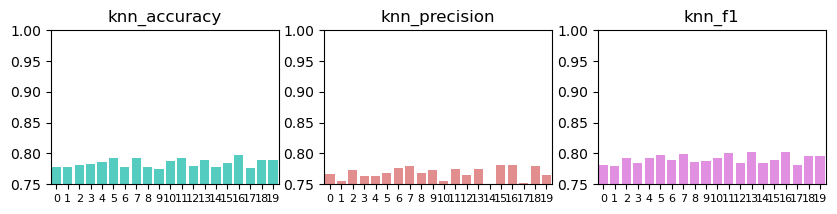

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 2))

plt.subplot(1,3,1)
sns.barplot(x=np.arange(20),y=knn_accuracy_list,color='turquoise')
plt.ylim(0.75,1)
plt.title("knn_accuracy")
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=10)

plt.subplot(1,3,2)
sns.barplot(x=np.arange(20),y=knn_precision_list,color='lightcoral')
plt.ylim(0.75,1)
plt.title("knn_precision")
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=10)

plt.subplot(1,3,3)
sns.barplot(x=np.arange(20),y=knn_f1_list,color="violet")
plt.ylim(0.75,1)
plt.title("knn_f1")
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=10)

#plt.savefig("knn_skor.png")
plt.show()


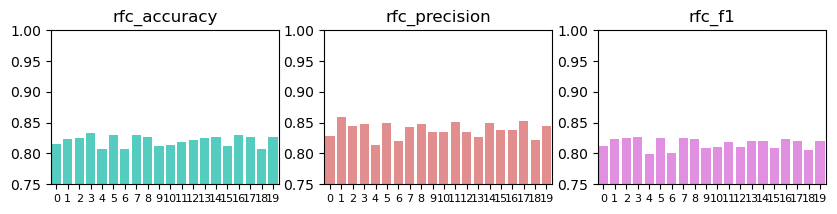

In [31]:
plt.figure(figsize=(10, 2))

plt.subplot(1,3,1)
sns.barplot(x=np.arange(20),y=rfc_accuracy_list,color='turquoise')
plt.ylim(0.75,1)
plt.title("rfc_accuracy")
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=10)

plt.subplot(1,3,2)
sns.barplot(x=np.arange(20),y=rfc_precision_list,color='lightcoral')
plt.ylim(0.75,1)
plt.title("rfc_precision")
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=10)

plt.subplot(1,3,3)
sns.barplot(x=np.arange(20),y=rfc_f1_list,color="violet")
plt.ylim(0.75,1)
plt.title("rfc_f1")
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=10)

#plt.savefig("rfc_skor.png")
plt.show()


In [32]:
knn_accuracy_mean = np.mean(knn_accuracy_list)
knn_precision_mean = np.mean(knn_precision_list)
knn_f1_mean = np.mean(knn_f1_list)
rfc_accuracy_mean = np.mean(rfc_accuracy_list)
rfc_precision_mean = np.mean(rfc_precision_list)
rfc_f1_mean = np.mean(rfc_f1_list)

knn_mean = (knn_accuracy_mean + knn_precision_mean + knn_f1_mean)/3
rfc_mean = (rfc_accuracy_mean + rfc_precision_mean + rfc_f1_mean)/3

print(knn_mean)
print(rfc_mean)

0.7811908584554529
0.8255222142360518


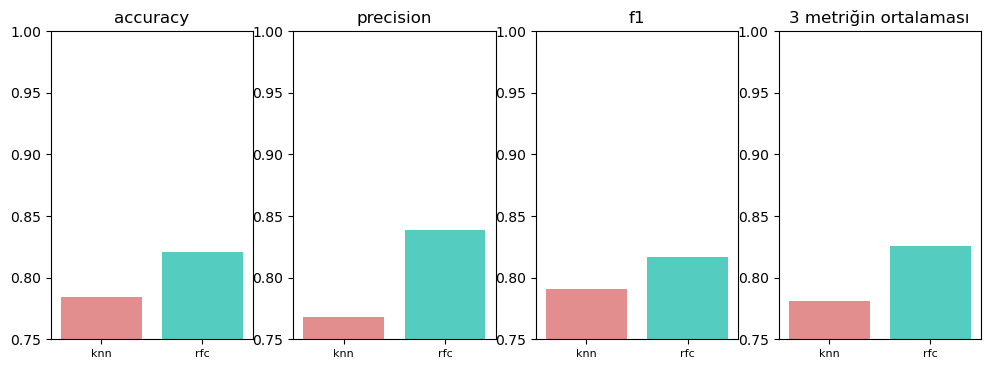

In [33]:
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
sns.barplot(x=['knn','rfc'],y=[knn_accuracy_mean,rfc_accuracy_mean],palette=['lightcoral','turquoise'])
plt.ylim(0.75,1)
plt.title("accuracy")
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=10)

plt.subplot(1,4,2)
sns.barplot(x=['knn','rfc'],y=[knn_precision_mean,rfc_precision_mean],palette=['lightcoral','turquoise'])
plt.ylim(0.75,1)
plt.title("precision")
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=10)

plt.subplot(1,4,3)
sns.barplot(x=['knn','rfc'],y=[knn_f1_mean,rfc_f1_mean],palette=['lightcoral','turquoise'])
plt.ylim(0.75,1)
plt.title("f1")
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=10)

plt.subplot(1,4,4)
sns.barplot(x=['knn','rfc'],y=[knn_mean,rfc_mean],palette=['lightcoral','turquoise'])
plt.ylim(0.75,1)
plt.title("3 metriğin ortalaması")
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=10)


#plt.savefig("karsilastirma.png")
plt.show()

# Validasyon veri setinin sınıf tahminini yapmadan önce, eğitim veri setinden validasyon veri seti büyüklüğünde rastgele test verileri oluşturulurak RFC modelinin performansı incelenmiştir. 

In [34]:
df2 = pd.read_csv('egitim.csv')
df2 = df2.drop(['PassengerId','Name'],axis=1)
df2[["Cabin1","Cabin_num","Cabin2"]] = df2["Cabin"].str.split('/',expand=True)
df2.drop("Cabin",axis=1,inplace=True)
df2["Cabin_num"] = pd.to_numeric(df2["Cabin_num"])
#df2.info()

numerik_sutunlar = df2.select_dtypes(include=["number"]).columns
kategorik_sutunlar = df2.select_dtypes(exclude=["number"]).columns.drop("Transported") #sinif verisi cikarildi
# for i in range(1):
#     for sutun in numerik_sutunlar:

#         q1 = df2[sutun].quantile(0.25)
#         q3 = df2[sutun].quantile(0.75)
#         iqr = q3-q1

#         alt_sinir = q1 - (iqr*1.5)
#         ust_sinir = q3 + (iqr*1.5)

#         filtre = ((df2[sutun] < alt_sinir) | (df2[sutun] > ust_sinir))

#         df2.loc[filtre, sutun] = None
        
#         #print(sutun,df2[filtre][sutun].count())

for sutun in numerik_sutunlar:
    ortalama = df2[sutun].mean()
    df2[sutun] = df2[sutun].fillna(ortalama)
        
for sutun in kategorik_sutunlar:
    mod = df2[sutun].value_counts().idxmax()   #sayac = df[filtre][sutun].value_counts().max()
    df2[sutun] = df2[sutun].fillna(mod)        
    
clean_df2 = pd.get_dummies(df2,['HomePlanet','Destination','Cabin1','Cabin2'])
#clean_df2.describe()
#clean_df2.head(20)

#clean_df2[numerik_sutunlar] = pd.DataFrame(sc.fit_transform(clean_df2[numerik_sutunlar]))

xx = clean_df2.drop("Transported",axis=1)
yy = clean_df2["Transported"]

ac_ort = 0
prec_ort = 0
f1_ort = 0
k = 50

for i in range(k):
    xx_train,xx_test,yy_train,yy_test = train_test_split(xx,yy,test_size=0.06)
    predd = best_knn.predict(xx_test)
    #print("KNN")
    #print(accuracy_score(yy_test,predd),precision_score(yy_test,predd),f1_score(yy_test,predd))

    predd = best_rfc.predict(xx_test)
    #print("RFC")
    
    ac_ort += accuracy_score(yy_test,predd)
    prec_ort += precision_score(yy_test,predd)
    f1_ort += f1_score(yy_test,predd)
    print(accuracy_score(yy_test,predd),precision_score(yy_test,predd),f1_score(yy_test,predd))

0.8943089430894309 0.9141630901287554 0.891213389121339
0.926829268292683 0.9543726235741445 0.9330855018587362
0.9004065040650406 0.9453781512605042 0.9018036072144288
0.9166666666666666 0.9555555555555556 0.9129511677282378
0.9105691056910569 0.92 0.9126984126984127
0.9126016260162602 0.9094650205761317 0.9113402061855669
0.9247967479674797 0.9556451612903226 0.9275929549902153
0.9024390243902439 0.9391304347826087 0.8999999999999999
0.9105691056910569 0.9218106995884774 0.910569105691057
0.9044715447154471 0.9191489361702128 0.9018789144050104
0.9146341463414634 0.9246861924686193 0.9132231404958678
0.9207317073170732 0.9574468085106383 0.9202453987730062
0.9044715447154471 0.9375 0.8993576017130621
0.9329268292682927 0.944206008583691 0.9302325581395349
0.8943089430894309 0.9184549356223176 0.8916666666666667
0.9085365853658537 0.9356223175965666 0.9064449064449065
0.926829268292683 0.9380530973451328 0.9217391304347826
0.9146341463414634 0.9346938775510204 0.916
0.9004065040650406

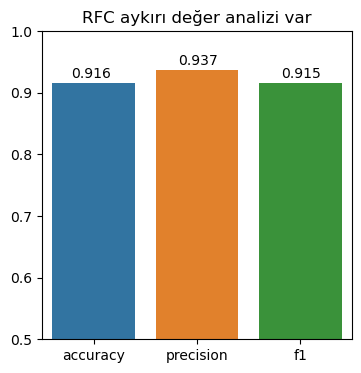

0.9158943089430898 0.9366211547990534 0.915395802276718


In [35]:
ac = ac_ort/k
prec = prec_ort/k
f1 = f1_ort/k

plt.figure(figsize=(4,4))

sns.barplot(x=["accuracy","precision","f1"],y=[ac,prec,f1])
plt.ylim(0.5,1)
plt.title("RFC aykırı değer analizi var")
plt.savefig("aykri_degerlsiz.png")
plt.text(-0.22,ac*1.01,'{:.3f}'.format(ac)) 
plt.text(0.82,prec*1.01,'{:.3f}'.format(prec))
plt.text(1.82,f1*1.01,'{:.3f}'.format(f1)) 
plt.show()
print(ac_ort/k, prec_ort/k, f1_ort/k)

In [36]:
# validation

In [37]:
vdf = pd.read_csv('validasyon.csv')

vdf[["Cabin1","Cabin_num","Cabin2"]] = vdf["Cabin"].str.split('/',expand=True)
vdf.drop("Cabin",axis=1,inplace=True)
vdf["Cabin_num"] = pd.to_numeric(vdf["Cabin_num"])

numerik_sutunlar = vdf.select_dtypes(include=["number"]).columns
kategorik_sutunlar = vdf.select_dtypes(exclude=["number"])

for sutun in numerik_sutunlar:
    ortalama = vdf[sutun].mean()
    vdf[sutun] = vdf[sutun].fillna(ortalama)
        
for sutun in kategorik_sutunlar:
    mod = vdf[sutun].value_counts().idxmax()
    vdf[sutun] = vdf[sutun].fillna(mod)        

vdf['CryoSleep'] = vdf['CryoSleep'].astype(bool)
vdf['VIP'] = vdf['VIP'].astype(bool)
    
PassengerID = vdf['PassengerId']
vdf = vdf.drop('PassengerId',axis=1)

vdf = pd.get_dummies(vdf)

vdf.insert(22, 'Cabin2_T',0)
#vdf.info()
#vdf.head()

rfc_pred = best_rfc.predict(vdf)
#knn_pred = best_knn.predict(vdf)
#print(accuracy_score(rfc_pred,knn_pred))
rfc_pred

0.856


array([False, False, False, False, False, False,  True,  True, False,
        True,  True,  True, False, False, False,  True, False, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False, False, False, False, False,  True, False,
        True, False, False, False,  True,  True, False, False,  True,
       False, False,  True, False, False, False,  True,  True,  True,
       False,  True, False, False,  True,  True, False,  True,  True,
       False, False, False, False,  True, False, False,  True, False,
        True, False,  True, False,  True,  True, False,  True, False,
        True,  True, False, False,  True, False,  True,  True, False,
        True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False,  True, False, False, False,  True,  True,
        True,  True, False, False, False, False,  True,  True, False,
        True,  True, False, False, False,  True,  True, False,  True,
       False,  True,

In [50]:
Transported = pd.DataFrame(rfc_pred)
Transported = Transported.astype(str)
output = pd.concat([PassengerID, Transported], axis=1)
output.columns = ['PassengerId','Transported']
output.to_excel("Output.xlsx",index=False)

<AxesSubplot:>

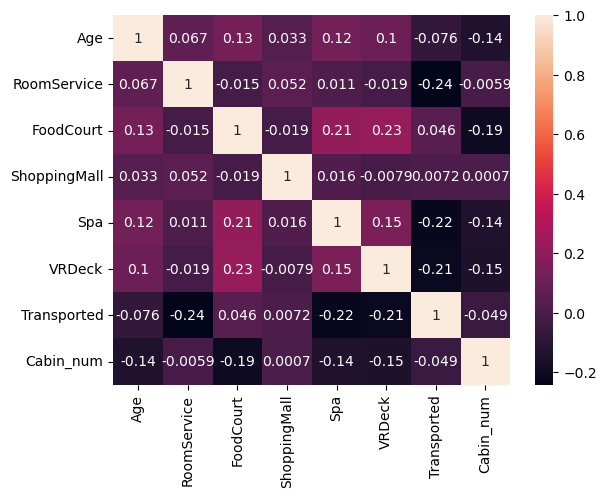

In [38]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

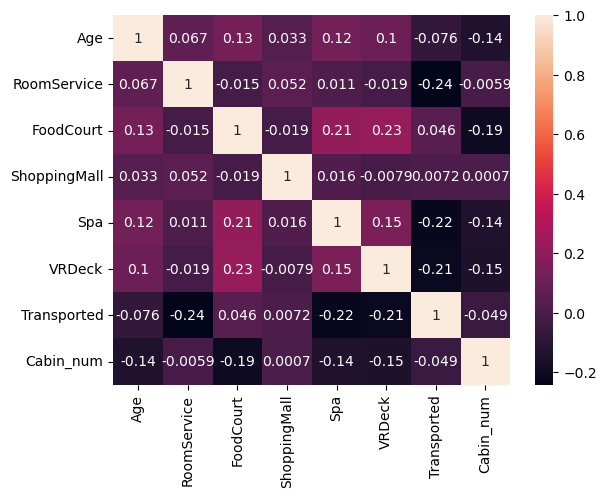

In [39]:
sns.heatmap(aykiri_degersiz_df.corr(),annot=True)